# A complete, non-guided Data Mining pipeline

In this task we are going to develop a complete Data Mining pipeline from one UCI repository's dataset. We hace chosen the following one:

https://archive.ics.uci.edu/ml/datasets/Student+Performance

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student school and social related features. Two datasets are provided regarding the performance in two distinct subjects: Mathematics and Portuguese language. The two datasets have been joined and we have used some classification models in order to predict the final grade of all the students. We have created five categories to do this: 'Sobresaliente', 'Notable', 'Bien', 'Aprobado' and 'Suspenso' based on their final grade. Furthermore, we have applied some regression models to calculate the final grade of each student. Next, we are going to explain the steps, methods and results.

### Data analysis.
We have used data from two datasets: one for the Mathematics subject and another dataset for the Portuguese language one in one school. We want to develop one model able to classify the students final grade according to all of the variables, and another one able to calculate this final grade using regression. We are not interested in the subject of each case, so we have joined two datasets in one and have worked with it.

The first step is concatenate the two datasets in order to work with the final one. Then, we have to manipulate and modify data because a lot of features are categorical features. The dataset has nominal and ordinal features, but the ordinal ones have been transformed by the autor of the dataset. So, we only have to worry about the nominal features, which are going to be encoded as we see in the following cells.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
student_mat = pd.read_csv(r"D:\Documentos\Master\temariomaster\p6.DescriptiveMachineLearning\Tareas\Tarea2.Pipeline\student-mat.csv",sep=';')
student_mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
student_mat.shape

(395, 33)

In [4]:
student_por = pd.read_csv(r"D:\Documentos\Master\temariomaster\p6.DescriptiveMachineLearning\Tareas\Tarea2.Pipeline\student-por.csv",sep=';')
student_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [5]:
student_por.shape

(649, 33)

In [6]:
# check nan values for student mat dataset
student_mat.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [7]:
print(student_mat.shape)
print(student_por.shape)

(395, 33)
(649, 33)


In [8]:
# check nan values for student por dataset
student_por.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [9]:
#check the type of the data
student_mat.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [10]:
#check type of the por dataframe
student_por.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [11]:
student_mat.insert(0, 'subject', 1)

In [12]:
student_por.insert(0, 'subject', 0)

In [13]:
student_data = pd.concat([student_mat, student_por], axis = 0, ignore_index = True)
student_data

,subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,1,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,1,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,1,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,MS,F,19,R,GT3,T,2,3,services,...,5,4,2,1,2,5,4,10,11,10
1040,0,MS,F,18,U,LE3,T,3,1,teacher,...,4,3,4,1,1,1,4,15,15,16
1041,0,MS,F,18,U,GT3,T,1,1,other,...,1,1,1,1,1,5,6,11,12,9
1042,0,MS,M,17,U,LE3,T,3,1,services,...,2,4,5,3,4,2,6,10,10,10


In [14]:
max_nota = student_data['G3'].max()
max_nota

20

In [15]:
student_data['G1'] = (student_data['G1'] * 10) / max_nota
student_data['G2'] = (student_data['G2'] * 10) / max_nota
student_data['G3'] = (student_data['G3'] * 10) / max_nota

In [16]:
student_data

,subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,2.5,3.0,3.0
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,2.5,2.5,3.0
2,1,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,3.5,4.0,5.0
3,1,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,7.5,7.0,7.5
4,1,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,MS,F,19,R,GT3,T,2,3,services,...,5,4,2,1,2,5,4,5.0,5.5,5.0
1040,0,MS,F,18,U,LE3,T,3,1,teacher,...,4,3,4,1,1,1,4,7.5,7.5,8.0
1041,0,MS,F,18,U,GT3,T,1,1,other,...,1,1,1,1,1,5,6,5.5,6.0,4.5
1042,0,MS,M,17,U,LE3,T,3,1,services,...,2,4,5,3,4,2,6,5.0,5.0,5.0


Once we have concatenated both datasets, we are going to create a new column where the final grade of each student was classified. The guideline is the same that exists here in Spain:

* 5 : x >= 9
* 4 : 7 <= x <= 8
* 3 : 6 <= x < 7
* 2 : 5 <= x < 6
* 1 : x < 5

In [17]:
conditions = [(student_data['G3'] >= 9), (student_data['G3'] >= 7) & (student_data['G3'] <= 8), (student_data['G3'] >= 6) & (student_data['G3'] < 7), (student_data['G3'] >= 5), (student_data['G3'] < 5)]

choices = [5, 4, 3, 2, 1]
#  this choices are 5 = sobresaliente, 4 = notable, 3 = bien, 2 = aprobado, 1 = suspenso
student_data['Nota'] = np.select(conditions, choices)

In [18]:
student_data

,subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Nota
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,6,2.5,3.0,3.0,1
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,4,2.5,2.5,3.0,1
2,1,GP,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,10,3.5,4.0,5.0,2
3,1,GP,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,2,7.5,7.0,7.5,4
4,1,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,4,3.0,5.0,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,MS,F,19,R,GT3,T,2,3,services,...,4,2,1,2,5,4,5.0,5.5,5.0,2
1040,0,MS,F,18,U,LE3,T,3,1,teacher,...,3,4,1,1,1,4,7.5,7.5,8.0,4
1041,0,MS,F,18,U,GT3,T,1,1,other,...,1,1,1,1,5,6,5.5,6.0,4.5,1
1042,0,MS,M,17,U,LE3,T,3,1,services,...,4,5,3,4,2,6,5.0,5.0,5.0,2


In [19]:
student_data.to_csv(r'D:\Documentos\Master\temariomaster\p6.DescriptiveMachineLearning\Tareas\Tarea2.Pipeline\student_data.csv',index=False)

In [20]:
import category_encoders as ce
# create an object of the OneHotEncoder
OHE = ce.OneHotEncoder(cols=['school',
                             'sex',
                             'address',
                             'famsize',
                             'Pstatus',
                             'Mjob',
                             'Fjob',
                             'reason',
                             'guardian',
                             'schoolsup',
                             'famsup',
                             'paid',
                             'activities',
                             'nursery',
                             'higher',
                             'internet',
                             'romantic'],use_cat_names=True)
# encode the categorical variables
student_data = OHE.fit_transform(student_data)

C:\Users\franc\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [21]:
student_data

,subject,school_GP,school_MS,sex_F,sex_M,age,address_U,address_R,famsize_GT3,famsize_LE3,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Nota
0,1,1,0,1,0,18,1,0,1,0,...,3,4,1,1,3,6,2.5,3.0,3.0,1
1,1,1,0,1,0,17,1,0,1,0,...,3,3,1,1,3,4,2.5,2.5,3.0,1
2,1,1,0,1,0,15,1,0,0,1,...,3,2,2,3,3,10,3.5,4.0,5.0,2
3,1,1,0,1,0,15,1,0,1,0,...,2,2,1,1,5,2,7.5,7.0,7.5,4
4,1,1,0,1,0,16,1,0,1,0,...,3,2,1,2,5,4,3.0,5.0,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,0,1,1,0,19,0,1,1,0,...,4,2,1,2,5,4,5.0,5.5,5.0,2
1040,0,0,1,1,0,18,1,0,0,1,...,3,4,1,1,1,4,7.5,7.5,8.0,4
1041,0,0,1,1,0,18,1,0,1,0,...,1,1,1,1,5,6,5.5,6.0,4.5,1
1042,0,0,1,0,1,17,1,0,0,1,...,4,5,3,4,2,6,5.0,5.0,5.0,2


The second step is find out all the outliers that our dataset has. If we have a look around all the dataset, it is quite obvious that the only features where some outliers might appear are 'age', 'absences' and the grade features if data have been wrongly introduced. Using unique() we can check all the values of each feature, so it is an easy way to find out features with outliers. After that, we will display some boxplots in order to analyse in a deeper way these features.

In [22]:
# Looking for the different values that each column has using pandas.unique() in order to mapping these values then.

which_columns = student_data.columns.values
uniques = {col: student_data[col].unique() for col in which_columns}

uniques

{'subject': array([1, 0], dtype=int64),
 'school_GP': array([1, 0], dtype=int64),
 'school_MS': array([0, 1], dtype=int64),
 'sex_F': array([1, 0], dtype=int64),
 'sex_M': array([0, 1], dtype=int64),
 'age': array([18, 17, 15, 16, 19, 22, 20, 21], dtype=int64),
 'address_U': array([1, 0], dtype=int64),
 'address_R': array([0, 1], dtype=int64),
 'famsize_GT3': array([1, 0], dtype=int64),
 'famsize_LE3': array([0, 1], dtype=int64),
 'Pstatus_A': array([1, 0], dtype=int64),
 'Pstatus_T': array([0, 1], dtype=int64),
 'Medu': array([4, 1, 3, 2, 0], dtype=int64),
 'Fedu': array([4, 1, 2, 3, 0], dtype=int64),
 'Mjob_at_home': array([1, 0], dtype=int64),
 'Mjob_health': array([0, 1], dtype=int64),
 'Mjob_other': array([0, 1], dtype=int64),
 'Mjob_services': array([0, 1], dtype=int64),
 'Mjob_teacher': array([0, 1], dtype=int64),
 'Fjob_teacher': array([1, 0], dtype=int64),
 'Fjob_other': array([0, 1], dtype=int64),
 'Fjob_services': array([0, 1], dtype=int64),
 'Fjob_health': array([0, 1], dty

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd226217f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd22621eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd22621490>,
 'medians': [<matplotlib.lines.Line2D at 0x1dd226425b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1dd22642910>,
 'means': []}

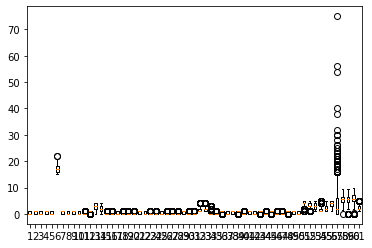

In [23]:
plt.boxplot(student_data)

As we can see in the boxplot in order to study better the case we are going to normalize the data

In [24]:
scaler = StandardScaler()
student_data_scaled = scaler.fit_transform(student_data)

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd22c3f880>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd22c3ffa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd22c3f520>,
 'medians': [<matplotlib.lines.Line2D at 0x1dd22c586a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1dd22c58a00>,
 'means': []}

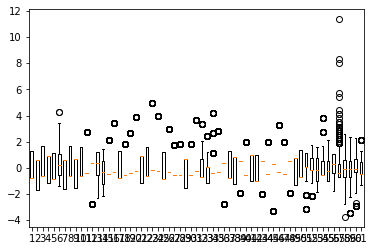

In [25]:
plt.boxplot(student_data_scaled)

Let's make some boxplots for the numeric features, one for 'age' feature and another one for 'absences'. There are no wrong values for any of these features. Is not a common situation, but there may be students who did not went to school in the whole year and thus, they have a huge number of absences. As we will see next, these students are usually students who have bad marks. 

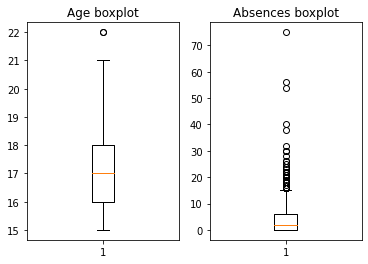

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.boxplot(x = student_data['age'])
ax1.set_title('Age boxplot')

ax2.boxplot(x = student_data['absences'])
ax2.set_title('Absences boxplot')

plt.show()

We have also displayed some boxplots for the grades and there are nothing wrong. The minimum grade is 0 or close to 0 and the maximum one is close to 20. Data have been introduced correctly.

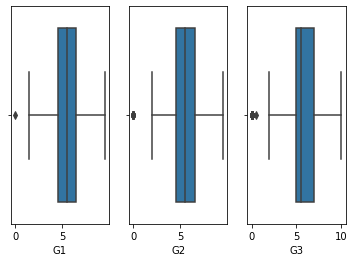

In [27]:
fig, axes = plt.subplots(1, 3)

sns.boxplot(x = student_data['G1'], ax = axes[0])
sns.boxplot(x = student_data['G2'], ax = axes[1])
sns.boxplot(x = student_data['G3'], ax = axes[2])
plt.show()

There are a lot of interesting plots that we can display. We have choosen this one because it seems very interesting: the relation between the number of absences and the final grade of the student. As the plot shows, the more absences the student has, the worse marks he has. Students with an outstanding final grade skip class much less than students with failure grades.

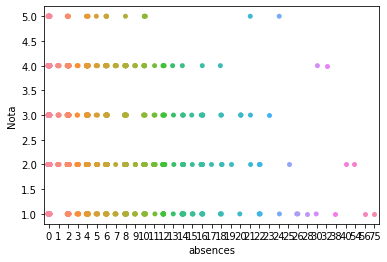

In [28]:

sns.stripplot(x = student_data['absences'], y = student_data['Nota'])

plt.show()

We could also plot the correlation between features in our dataset in case we wanted to reduce the number of features

In [29]:
corr = student_data.corr()
print(corr)

            subject  school_GP  school_MS     sex_F     sex_M       age  \
subject    1.000000   0.256088  -0.256088 -0.062192  0.062192 -0.018790   
school_GP  0.256088   1.000000  -1.000000 -0.074955  0.074955 -0.169938   
school_MS -0.256088  -1.000000   1.000000  0.074955 -0.074955  0.169938   
sex_F     -0.062192  -0.074955   0.074955  1.000000 -1.000000  0.038832   
sex_M      0.062192   0.074955  -0.074955 -1.000000  1.000000 -0.038832   
...             ...        ...        ...       ...       ...       ...   
absences   0.160125   0.155146  -0.155146  0.013076 -0.013076  0.153196   
G1        -0.079727   0.169123  -0.169123  0.025122 -0.025122 -0.124121   
G2        -0.126459   0.144858  -0.144858  0.025024 -0.025024 -0.119475   
G3        -0.187166   0.127114  -0.127114  0.031472 -0.031472 -0.125282   
Nota      -0.113315   0.147036  -0.147036  0.028382 -0.028382 -0.134062   

           address_U  address_R  famsize_GT3  famsize_LE3  ...  freetime  \
subject     0.087916  -

Now we are going to separate the labels that we are going to use for the reggresion and classification study so that we can easily import it later

In [30]:
y = []
y = student_data['G3']

In [31]:
y

0       3.0
1       3.0
2       5.0
3       7.5
4       5.0
       ... 
1039    5.0
1040    8.0
1041    4.5
1042    5.0
1043    5.5
Name: G3, Length: 1044, dtype: float64

In [32]:
y.to_csv(r'D:\Documentos\Master\temariomaster\p6.DescriptiveMachineLearning\Tareas\Tarea2.Pipeline\reggresion_y.csv')

In [33]:
print("Examples for each calification: ", collections.Counter(y) )

Examples for each calification:  Counter({5.0: 153, 5.5: 151, 6.5: 113, 6.0: 103, 7.0: 90, 7.5: 82, 4.0: 67, 4.5: 63, 0.0: 53, 8.0: 52, 8.5: 35, 9.0: 27, 3.5: 19, 3.0: 18, 2.5: 8, 9.5: 7, 10.0: 1, 2.0: 1, 0.5: 1})


In [34]:
y_class = student_data['Nota']

In [35]:
y_class.to_csv(r'D:\Documentos\Master\temariomaster\p6.DescriptiveMachineLearning\Tareas\Tarea2.Pipeline\classification_y.csv')

In [36]:
print("Examples for each calification: ", collections.Counter(y_class) )

Examples for each calification:  Counter({2: 339, 1: 230, 4: 224, 3: 216, 5: 35})


C:\Users\franc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Nota', ylabel='count'>

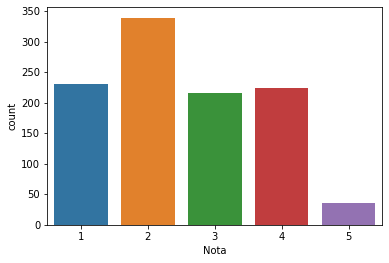

In [37]:
sns.countplot(y_class)

We can see that our classification problem has unbalanced classes so we will have to fix that later in the analysis

In order to do the study we are going to create two datasets from the student one. The first one is going to be the classsification excercice where we are going to predict if the student is goint to fail, pass, or get a really good calification and for this we are going to use the 'Notas' column as the label.
In the second case we are going to do the reggresion, in order to perform this study we are going to use the 'G3' column as our label to predict wich is the calification the student is going to get.

# Classification study

Before designing the pipeline we are going to do a quick model to check how is our accuracy score and to see how the model performs. To do that we have chosen a random forest reggresor.

In [39]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from imblearn.combine import SMOTETomek

In [40]:
X = student_data
X

,subject,school_GP,school_MS,sex_F,sex_M,age,address_U,address_R,famsize_GT3,famsize_LE3,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Nota
0,1,1,0,1,0,18,1,0,1,0,...,3,4,1,1,3,6,2.5,3.0,3.0,1
1,1,1,0,1,0,17,1,0,1,0,...,3,3,1,1,3,4,2.5,2.5,3.0,1
2,1,1,0,1,0,15,1,0,0,1,...,3,2,2,3,3,10,3.5,4.0,5.0,2
3,1,1,0,1,0,15,1,0,1,0,...,2,2,1,1,5,2,7.5,7.0,7.5,4
4,1,1,0,1,0,16,1,0,1,0,...,3,2,1,2,5,4,3.0,5.0,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,0,1,1,0,19,0,1,1,0,...,4,2,1,2,5,4,5.0,5.5,5.0,2
1040,0,0,1,1,0,18,1,0,0,1,...,3,4,1,1,1,4,7.5,7.5,8.0,4
1041,0,0,1,1,0,18,1,0,1,0,...,1,1,1,1,5,6,5.5,6.0,4.5,1
1042,0,0,1,0,1,17,1,0,0,1,...,4,5,3,4,2,6,5.0,5.0,5.0,2


In [41]:
X = X.drop(columns=['G3','Nota'])
X

,subject,school_GP,school_MS,sex_F,sex_M,age,address_U,address_R,famsize_GT3,famsize_LE3,...,romantic_yes,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,1,1,0,1,0,18,1,0,1,0,...,0,4,3,4,1,1,3,6,2.5,3.0
1,1,1,0,1,0,17,1,0,1,0,...,0,5,3,3,1,1,3,4,2.5,2.5
2,1,1,0,1,0,15,1,0,0,1,...,0,4,3,2,2,3,3,10,3.5,4.0
3,1,1,0,1,0,15,1,0,1,0,...,1,3,2,2,1,1,5,2,7.5,7.0
4,1,1,0,1,0,16,1,0,1,0,...,0,4,3,2,1,2,5,4,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,0,1,1,0,19,0,1,1,0,...,0,5,4,2,1,2,5,4,5.0,5.5
1040,0,0,1,1,0,18,1,0,0,1,...,0,4,3,4,1,1,1,4,7.5,7.5
1041,0,0,1,1,0,18,1,0,1,0,...,0,1,1,1,1,1,5,6,5.5,6.0
1042,0,0,1,0,1,17,1,0,0,1,...,0,2,4,5,3,4,2,6,5.0,5.0


In [42]:
y =  pd.read_csv(r'D:\Documentos\Master\temariomaster\p6.DescriptiveMachineLearning\Tareas\Tarea2.Pipeline\classification_y.csv',index_col=False).drop(['Unnamed: 0'],axis=1)
y

,Nota
0,1
1,1
2,2
3,4
4,2
...,...
1039,2
1040,4
1041,1
1042,2


In [43]:
y.shape

(1044, 1)

In [44]:
y = y.values
y = y.ravel()

In [45]:
X.shape

(1044, 59)

In [46]:
#we scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

As we have unbalanced clases we are going to do a over sampling with imblearn library using SMOTETomek, this oversampling will duplicate the data in tha classes until all of them have the almost same number of samples.

In [50]:
print(X.shape)
print(y.shape)

(1449, 59)
(1449,)


In [51]:
smk = SMOTETomek(random_state=11)
X, y = smk.fit_resample(X,y)

In [52]:
print("Examples for each calification: ", collections.Counter(y) )

Examples for each calification:  Counter({2: 339, 4: 339, 1: 339, 5: 339, 3: 339})


Now we can see how the number of samples are the same for every class.

In [53]:
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=13)

In [54]:
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

In [55]:
params = {'n_estimators':[10,50,100,200],
          'criterion':['gini','entropy'],
          'max_depth':[3,None]}



In [56]:
miModelo = RandomForestClassifier()

In [57]:
gs = GridSearchCV(estimator=miModelo,param_grid=params,scoring='accuracy',cv=5)

In [58]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [59]:
gs.best_estimator_

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [60]:
gs.best_score_

0.890842739309746

In [61]:
clfBest = gs.best_estimator_


In [62]:
clfBest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [63]:
y_pred = clfBest.predict(X_test)


0.8672566371681416


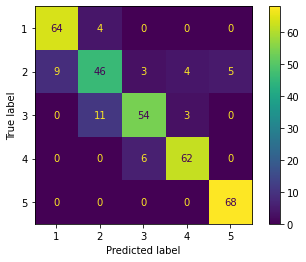

In [64]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clfBest,X_test,y_test)

#print the best solution

Ass we can see we get a very good accuracy, this model works very well. It wouldnt have been the same if we haden´t balanced the clases.
After we used imblearn to balance the classes we couldnt get an accuracy higher than 68%. That is way it is so important to have balanced classes when training the model.
Now that we know how our data is, we are going to start implementing the pipeline.

## Pipeline disign for Classification

In this part of the esay we are going to implement 3 different pipelines. This 3 pipelines will do all the data preprocesing we think is needed for this dataset and it will also implement the model.
To perform the classification sutudy we have chosen 3 difirents models, SVC, Random forest classification and MPL. 

#### We have not added the imblearn mehtod to balance the classes into the pipeline because in this or the orther models we got surprisingly a lower accuracy when adding it.

### Pipeline for SVC

We are going to start by doing the SVC classification

In [69]:
import pandas as pd
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.combine import SMOTETomek

First we load the data

In [70]:
X = pd.read_csv(r'D:\Documentos\Master\temariomaster\p6.DescriptiveMachineLearning\Tareas\Tarea2.Pipeline\student_data.csv',index_col=False)
X

,subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Nota
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,6,2.5,3.0,3.0,1
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,4,2.5,2.5,3.0,1
2,1,GP,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,10,3.5,4.0,5.0,2
3,1,GP,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,2,7.5,7.0,7.5,4
4,1,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,4,3.0,5.0,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,MS,F,19,R,GT3,T,2,3,services,...,4,2,1,2,5,4,5.0,5.5,5.0,2
1040,0,MS,F,18,U,LE3,T,3,1,teacher,...,3,4,1,1,1,4,7.5,7.5,8.0,4
1041,0,MS,F,18,U,GT3,T,1,1,other,...,1,1,1,1,5,6,5.5,6.0,4.5,1
1042,0,MS,M,17,U,LE3,T,3,1,services,...,4,5,3,4,2,6,5.0,5.0,5.0,2


In [71]:
y =  pd.read_csv(r'D:\Documentos\Master\temariomaster\p6.DescriptiveMachineLearning\Tareas\Tarea2.Pipeline\classification_y.csv',index_col=False).drop(['Unnamed: 0'],axis=1)
y

,Nota
0,1
1,1
2,2
3,4
4,2
...,...
1039,2
1040,4
1041,1
1042,2


After loading the data we are going to separate our data for training and testing with a test size of 0.1 and stratifiying the y

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 11,stratify = y)

Now we are going to design the preprocesing of the data by droping the columns that correspond to the labels and after that
we are going to choose the columns where we find strings/objects and need to be transformed to numbers, this transformation will be performed by the OneHotEncoder method.

In [73]:
from sklearn.base import BaseEstimator

columns_to_encode = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[
                                    ('drop_columns', 'drop', ['G3','Nota']),
                                    ('encoding', OneHotEncoder(), columns_to_encode)])

After having the steps for the data transformation we are going to create a pipeline that after this preprocesing scales the data and implements the model.

In [74]:
model_pipeline = Pipeline(steps=[('pre_processing',pre_process),       
                                 ('scale_data', StandardScaler()),
                                 ('svc', SVC())])

In [75]:
params = {'svc__C':[10],
          'svc__kernel':['rbf'],
          'svc__gamma':['scale']}

In [76]:
y_train = y_train.values
y_train = y_train.ravel()
y_test = y_test.values
y_test = y_test.ravel()


In [77]:
gs = GridSearchCV(estimator=model_pipeline,param_grid=params,scoring='accuracy',cv=5,verbose=1)

In [78]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre_processing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('drop_columns',
                                                                         'drop',
                                                                         ['G3',
                                                                          'Nota']),
                                                                        ('encoding',
                                                                         OneHotEncoder(),
                                                                         ['school',
                                                                          'sex',
                                                                          'address',
                                                                          'famsiz

In [79]:
gs.best_score_

0.5366992831949027

In [80]:
clfBest = gs.best_estimator_
clfBest.fit(X_train,y_train)

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['G3', 'Nota']),
                                                 ('encoding', OneHotEncoder(),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Mjob',
                                                   'Fjob', 'reason', 'guardian',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic'])])),
                ('scale_data', StandardScaler()), ('svc', SVC(C=10))])

In [81]:
y_pred = clfBest.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.5904761904761905


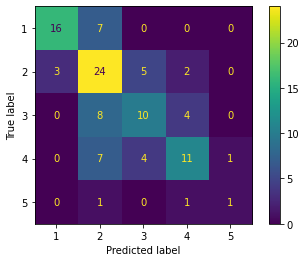

In [83]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clfBest,X_test,y_test)


### Random forest pipeline

In [64]:
import pandas as pd
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [65]:
X = pd.read_csv(r'D:\Documentos\Master\temariomaster\p6.DescriptiveMachineLearning\Tareas\Tarea2.Pipeline\student_data.csv',index_col=False)
X

,subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Nota
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,6,2.5,3.0,3.0,1
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,4,2.5,2.5,3.0,1
2,1,GP,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,10,3.5,4.0,5.0,2
3,1,GP,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,2,7.5,7.0,7.5,4
4,1,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,4,3.0,5.0,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,MS,F,19,R,GT3,T,2,3,services,...,4,2,1,2,5,4,5.0,5.5,5.0,2
1040,0,MS,F,18,U,LE3,T,3,1,teacher,...,3,4,1,1,1,4,7.5,7.5,8.0,4
1041,0,MS,F,18,U,GT3,T,1,1,other,...,1,1,1,1,5,6,5.5,6.0,4.5,1
1042,0,MS,M,17,U,LE3,T,3,1,services,...,4,5,3,4,2,6,5.0,5.0,5.0,2


In [66]:
y =  pd.read_csv(r'D:\Documentos\Master\temariomaster\p6.DescriptiveMachineLearning\Tareas\Tarea2.Pipeline\classification_y.csv',index_col=False).drop(['Unnamed: 0'],axis=1)
y

,Nota
0,1
1,1
2,2
3,4
4,2
...,...
1039,2
1040,4
1041,1
1042,2


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 11,stratify = y)

In [68]:
from sklearn.base import BaseEstimator

columns_to_encode = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[
                                    ('drop_columns', 'drop', ['G3','Nota']),
                                    ('encoding', OneHotEncoder(), columns_to_encode)])

In [11]:
model_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 ('scale_data', StandardScaler()),
                                 ('clf', RandomForestClassifier())])

In [70]:
params = {'clf__n_estimators':[10,50,100,200],
          'clf__criterion':['gini','entropy'],
          'clf__max_depth':[3,None]}


In [71]:
y_train = y_train.values
y_train = y_train.ravel()
y_test = y_test.values
y_test = y_test.ravel()

In [72]:
gs = GridSearchCV(estimator=model_pipeline1,param_grid=params,scoring='accuracy',cv=5,verbose=1)

In [73]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre_processing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('drop_columns',
                                                                         'drop',
                                                                         ['G3',
                                                                          'Nota']),
                                                                        ('encoding',
                                                                         OneHotEncoder(),
                                                                         ['school',
                                                                          'sex',
                                                                          'address',
                                                                          'famsiz

In [74]:
gs.best_score_

0.6986232790988736

In [75]:
clfBest = gs.best_estimator_
clfBest.fit(X_train,y_train)

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['G3', 'Nota']),
                                                 ('encoding', OneHotEncoder(),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Mjob',
                                                   'Fjob', 'reason', 'guardian',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic'])])),
                ('smk', SMOTETomek(random_state=43)),
                ('scale_data', StandardScaler()),
                ('clf', RandomForestClass

In [18]:
y_pred = clfBest.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.7428571428571429


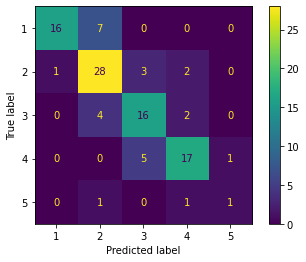

In [20]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clfBest,X_test,y_test)


### MLP classifier pipeline

In [23]:
import pandas as pd
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [24]:
X = pd.read_csv(r'D:\Documentos\Master\temariomaster\p6.DescriptiveMachineLearning\Tareas\Tarea2.Pipeline\student_data.csv',index_col=False)
X

,subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Nota
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,6,2.5,3.0,3.0,1
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,4,2.5,2.5,3.0,1
2,1,GP,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,10,3.5,4.0,5.0,2
3,1,GP,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,2,7.5,7.0,7.5,4
4,1,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,4,3.0,5.0,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,MS,F,19,R,GT3,T,2,3,services,...,4,2,1,2,5,4,5.0,5.5,5.0,2
1040,0,MS,F,18,U,LE3,T,3,1,teacher,...,3,4,1,1,1,4,7.5,7.5,8.0,4
1041,0,MS,F,18,U,GT3,T,1,1,other,...,1,1,1,1,5,6,5.5,6.0,4.5,1
1042,0,MS,M,17,U,LE3,T,3,1,services,...,4,5,3,4,2,6,5.0,5.0,5.0,2


In [25]:
y =  pd.read_csv(r'D:\Documentos\Master\temariomaster\p6.DescriptiveMachineLearning\Tareas\Tarea2.Pipeline\classification_y.csv',index_col=False).drop(['Unnamed: 0'],axis=1)
y

,Nota
0,1
1,1
2,2
3,4
4,2
...,...
1039,2
1040,4
1041,1
1042,2


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 11,stratify = y)

In [27]:
from sklearn.base import BaseEstimator

columns_to_encode = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[
                                    ('drop_columns', 'drop', ['G3','Nota']),
                                    ('encoding', OneHotEncoder(), columns_to_encode)])

In [28]:
model_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 ('scale_data', StandardScaler()),
                                 ('clf', MLPClassifier())])

In [29]:
params = {'clf__hidden_layer_sizes':[(20),(20,20),(50,50),(100,100,100)],
          'clf__activation':['identity','tanh','relu'],
          'clf__alpha':[0.001,0.01]}

In [30]:
y_train = y_train.values
y_train = y_train.ravel()
y_test = y_test.values
y_test = y_test.ravel()

In [31]:
gs = GridSearchCV(estimator=model_pipeline,param_grid=params,scoring='accuracy',cv=5,verbose=1)

In [32]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\franc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\franc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\franc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\franc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnin

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre_processing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('drop_columns',
                                                                         'drop',
                                                                         ['G3',
                                                                          'Nota']),
                                                                        ('encoding',
                                                                         OneHotEncoder(),
                                                                         ['school',
                                                                          'sex',
                                                                          'address',
                                                                          'famsiz

In [33]:
gs.best_score_

0.6453407668676755

In [34]:
clfBest = gs.best_estimator_
clfBest.fit(X_train,y_train)

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['G3', 'Nota']),
                                                 ('encoding', OneHotEncoder(),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Mjob',
                                                   'Fjob', 'reason', 'guardian',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic'])])),
                ('scale_data', StandardScaler()),
                ('clf',
                 MLPClassifier(activation='identity', alpha=0.01,
     

In [35]:
y_pred = clfBest.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.6571428571428571


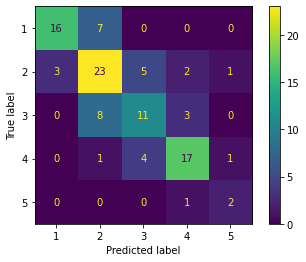

In [37]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clfBest,X_test,y_test)

### As we can check we get a better result when using Random forest classificator

# Regression study

As we did with the classification study we are going to perfomr a first reggresion predicction so that we know if the model perfomrs well and what kind of r2 score we can get on a first atempt

In [84]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [86]:
X = []
X = student_data
X

,subject,school_GP,school_MS,sex_F,sex_M,age,address_U,address_R,famsize_GT3,famsize_LE3,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Nota
0,1,1,0,1,0,18,1,0,1,0,...,3,4,1,1,3,6,2.5,3.0,3.0,1
1,1,1,0,1,0,17,1,0,1,0,...,3,3,1,1,3,4,2.5,2.5,3.0,1
2,1,1,0,1,0,15,1,0,0,1,...,3,2,2,3,3,10,3.5,4.0,5.0,2
3,1,1,0,1,0,15,1,0,1,0,...,2,2,1,1,5,2,7.5,7.0,7.5,4
4,1,1,0,1,0,16,1,0,1,0,...,3,2,1,2,5,4,3.0,5.0,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,0,1,1,0,19,0,1,1,0,...,4,2,1,2,5,4,5.0,5.5,5.0,2
1040,0,0,1,1,0,18,1,0,0,1,...,3,4,1,1,1,4,7.5,7.5,8.0,4
1041,0,0,1,1,0,18,1,0,1,0,...,1,1,1,1,5,6,5.5,6.0,4.5,1
1042,0,0,1,0,1,17,1,0,0,1,...,4,5,3,4,2,6,5.0,5.0,5.0,2


In [87]:
y = []
y = student_data['G3']
y

0       3.0
1       3.0
2       5.0
3       7.5
4       5.0
       ... 
1039    5.0
1040    8.0
1041    4.5
1042    5.0
1043    5.5
Name: G3, Length: 1044, dtype: float64

In [88]:
X = X.drop(columns=['G3','Nota'])
X

,subject,school_GP,school_MS,sex_F,sex_M,age,address_U,address_R,famsize_GT3,famsize_LE3,...,romantic_yes,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,1,1,0,1,0,18,1,0,1,0,...,0,4,3,4,1,1,3,6,2.5,3.0
1,1,1,0,1,0,17,1,0,1,0,...,0,5,3,3,1,1,3,4,2.5,2.5
2,1,1,0,1,0,15,1,0,0,1,...,0,4,3,2,2,3,3,10,3.5,4.0
3,1,1,0,1,0,15,1,0,1,0,...,1,3,2,2,1,1,5,2,7.5,7.0
4,1,1,0,1,0,16,1,0,1,0,...,0,4,3,2,1,2,5,4,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,0,1,1,0,19,0,1,1,0,...,0,5,4,2,1,2,5,4,5.0,5.5
1040,0,0,1,1,0,18,1,0,0,1,...,0,4,3,4,1,1,1,4,7.5,7.5
1041,0,0,1,1,0,18,1,0,1,0,...,0,1,1,1,1,1,5,6,5.5,6.0
1042,0,0,1,0,1,17,1,0,0,1,...,0,2,4,5,3,4,2,6,5.0,5.0


In [89]:
scaler = StandardScaler()
# fit with the Item_MRP
X = scaler.fit_transform(X)

In [90]:
sss = ShuffleSplit(n_splits=1,test_size=0.1,random_state=13)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [91]:
params = {'C':[10],
          'kernel':['rbf'],
          'gamma':['scale'],
          'epsilon':[0.1]}

In [92]:
miModelo = SVR()

In [93]:
gs = GridSearchCV(estimator=miModelo,param_grid=params,scoring='r2',cv=5)

In [94]:
gs.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [10], 'epsilon': [0.1], 'gamma': ['scale'],
                         'kernel': ['rbf']},
             scoring='r2')

In [95]:
clfBest = gs.best_estimator_


In [96]:
clfBest.fit(X_train,y_train)

SVR(C=10)

In [97]:
y_pred = clfBest.predict(X_test)

In [98]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))


0.6828019213276921


Text(0, 0.5, 'ypred')

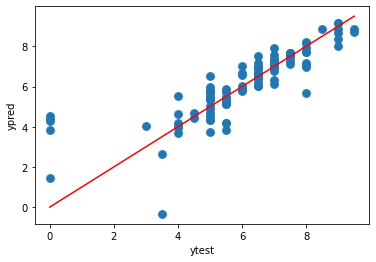

In [99]:
plt.scatter(y_test,y_pred,s=60)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'r')
plt.xlabel('ytest')
plt.ylabel('ypred')

We get a 68 r2 score, it is not bad but we think we can get a better one. Lest start designing the pipelines. In this case we are using a SVR model, a random forest reggresor and a MPL for reggresion.

## Pipeline disign for Regresssion


### PIpeline for SVR

In [38]:
import pandas as pd
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [39]:
X = pd.read_csv(r'D:\Documentos\Master\temariomaster\p6.DescriptiveMachineLearning\Tareas\Tarea2.Pipeline\student_data.csv',index_col=False)
X

,subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Nota
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,6,2.5,3.0,3.0,1
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,4,2.5,2.5,3.0,1
2,1,GP,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,10,3.5,4.0,5.0,2
3,1,GP,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,2,7.5,7.0,7.5,4
4,1,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,4,3.0,5.0,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,MS,F,19,R,GT3,T,2,3,services,...,4,2,1,2,5,4,5.0,5.5,5.0,2
1040,0,MS,F,18,U,LE3,T,3,1,teacher,...,3,4,1,1,1,4,7.5,7.5,8.0,4
1041,0,MS,F,18,U,GT3,T,1,1,other,...,1,1,1,1,5,6,5.5,6.0,4.5,1
1042,0,MS,M,17,U,LE3,T,3,1,services,...,4,5,3,4,2,6,5.0,5.0,5.0,2


In [40]:
y =  pd.read_csv(r'D:\Documentos\Master\temariomaster\p6.DescriptiveMachineLearning\Tareas\Tarea2.Pipeline\reggresion_y.csv',index_col=False).drop(['Unnamed: 0'],axis=1)
y

,G3
0,3.0
1,3.0
2,5.0
3,7.5
4,5.0
...,...
1039,5.0
1040,8.0
1041,4.5
1042,5.0


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 11)

In [42]:
from sklearn.base import BaseEstimator

columns_to_encode = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[
                                    ('drop_columns', 'drop', ['G3','Nota']),
                                    ('encoding', OneHotEncoder(), columns_to_encode)])

In [43]:
model_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 ('scale_data', StandardScaler()),
                                 ('svr', SVR())])

In [44]:
params = {'svr__C':[10],
          'svr__kernel':['rbf'],
          'svr__gamma':['scale'],
          'svr__epsilon':[0.1]}

In [45]:
gs = GridSearchCV(estimator=model_pipeline,param_grid=params,scoring='r2',cv=5,verbose=1)

In [46]:
y_train = y_train.values


In [47]:
y_train = y_train.ravel()

In [48]:
y_test = y_test.values

In [49]:
y_test = y_test.ravel()

In [50]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre_processing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('drop_columns',
                                                                         'drop',
                                                                         ['G3',
                                                                          'Nota']),
                                                                        ('encoding',
                                                                         OneHotEncoder(),
                                                                         ['school',
                                                                          'sex',
                                                                          'address',
                                                                          'famsiz

In [51]:
print(gs.best_score_)

0.7736854219886726


In [52]:
best = gs.best_estimator_
best.fit(X_train, y_train)
best.score(X_test, y_test)

0.7875028149785542

### Pipeline for Random forest

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
X = pd.read_csv(r'D:\Documentos\Master\temariomaster\p6.DescriptiveMachineLearning\Tareas\Tarea2.Pipeline\student_data.csv',index_col=False)
X

,subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Nota
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,6,2.5,3.0,3.0,1
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,4,2.5,2.5,3.0,1
2,1,GP,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,10,3.5,4.0,5.0,2
3,1,GP,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,2,7.5,7.0,7.5,4
4,1,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,4,3.0,5.0,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,MS,F,19,R,GT3,T,2,3,services,...,4,2,1,2,5,4,5.0,5.5,5.0,2
1040,0,MS,F,18,U,LE3,T,3,1,teacher,...,3,4,1,1,1,4,7.5,7.5,8.0,4
1041,0,MS,F,18,U,GT3,T,1,1,other,...,1,1,1,1,5,6,5.5,6.0,4.5,1
1042,0,MS,M,17,U,LE3,T,3,1,services,...,4,5,3,4,2,6,5.0,5.0,5.0,2


In [77]:
y =  pd.read_csv(r'D:\Documentos\Master\temariomaster\p6.DescriptiveMachineLearning\Tareas\Tarea2.Pipeline\reggresion_y.csv',index_col=False).drop(['Unnamed: 0'],axis=1)
y

,G3
0,3.0
1,3.0
2,5.0
3,7.5
4,5.0
...,...
1039,5.0
1040,8.0
1041,4.5
1042,5.0


In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 11)

In [80]:
from sklearn.base import BaseEstimator

columns_to_encode = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[
                                    ('drop_columns', 'drop', ['G3','Nota']),
                                    ('encoding', OneHotEncoder(), columns_to_encode)])

In [57]:
model_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 ('scale_data', StandardScaler()),
                                 ('clf', RandomForestRegressor())])

In [58]:
params = {
    "clf__n_estimators": [100, 500, 1000],
    "clf__max_depth": [1, 5, 10, 25],
    "clf__max_features": [*np.arange(0.1, 1.1, 0.1)],
}

In [59]:
gs = GridSearchCV(estimator=model_pipeline,param_grid=params,scoring='r2',cv=5,verbose=1)

In [81]:
y_train = y_train.values
y_test = y_test.values

In [82]:
y_train = y_train.ravel()
y_test = y_test.ravel()

In [62]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 28.1min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre_processing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('drop_columns',
                                                                         'drop',
                                                                         ['G3',
                                                                          'Nota']),
                                                                        ('encoding',
                                                                         OneHotEncoder(),
                                                                         ['school',
                                                                          'sex',
                                                                          'address',
                                                                          'famsiz

In [63]:
print(gs.best_score_)

0.8587645798585019


In [64]:
best = gs.best_estimator_
best.fit(X_train, y_train)
best.score(X_test, y_test)

0.8705701426103902

### MLP reggresor pipeline

In [88]:
import pandas as pd
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [89]:
X = pd.read_csv(r'D:\Documentos\Master\temariomaster\p6.DescriptiveMachineLearning\Tareas\Tarea2.Pipeline\student_data.csv',index_col=False)
X

,subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Nota
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,6,2.5,3.0,3.0,1
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,4,2.5,2.5,3.0,1
2,1,GP,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,10,3.5,4.0,5.0,2
3,1,GP,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,2,7.5,7.0,7.5,4
4,1,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,4,3.0,5.0,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,MS,F,19,R,GT3,T,2,3,services,...,4,2,1,2,5,4,5.0,5.5,5.0,2
1040,0,MS,F,18,U,LE3,T,3,1,teacher,...,3,4,1,1,1,4,7.5,7.5,8.0,4
1041,0,MS,F,18,U,GT3,T,1,1,other,...,1,1,1,1,5,6,5.5,6.0,4.5,1
1042,0,MS,M,17,U,LE3,T,3,1,services,...,4,5,3,4,2,6,5.0,5.0,5.0,2


In [90]:
y =  pd.read_csv(r'D:\Documentos\Master\temariomaster\p6.DescriptiveMachineLearning\Tareas\Tarea2.Pipeline\reggresion_y.csv',index_col=False).drop(['Unnamed: 0'],axis=1)
y

,G3
0,3.0
1,3.0
2,5.0
3,7.5
4,5.0
...,...
1039,5.0
1040,8.0
1041,4.5
1042,5.0


In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 11)

In [92]:
from sklearn.base import BaseEstimator

columns_to_encode = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[
                                    ('drop_columns', 'drop', ['G3','Nota']),
                                    ('encoding', OneHotEncoder(), columns_to_encode)])

In [93]:
model_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 ('scale_data', StandardScaler()),
                                 ('clf', MLPRegressor())])

In [94]:
params = {
    "clf__hidden_layer_sizes":[(20),(20,20),(50,50),(100,100,100)],
    "clf__activation": ['identity','tanh','relu'],
    "clf__alpha":[0.001,0.01]
}

In [95]:
gs = GridSearchCV(estimator=model_pipeline,param_grid=params,scoring='r2',cv=5,verbose=1)

In [96]:
y_train = y_train.values
y_test = y_test.values

In [97]:
y_train = y_train.ravel()
y_test = y_test.ravel()

In [98]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\franc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\franc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\franc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\franc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\franc\anaconda3\lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre_processing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('drop_columns',
                                                                         'drop',
                                                                         ['G3',
                                                                          'Nota']),
                                                                        ('encoding',
                                                                         OneHotEncoder(),
                                                                         ['school',
                                                                          'sex',
                                                                          'address',
                                                                          'famsiz

In [99]:
print(gs.best_score_)

0.8269045570444877


In [100]:
best = gs.best_estimator_
best.fit(X_train, y_train)
best.score(X_test, y_test)

0.859760884743791

### As we can see the model that work better for regression is the Random forest regressor